In [33]:
def r2_rmse_vals( Y_true, Y_pred, label ) :
    # (ypred-ytrue) squared numeratore
    diff_numeratore = []
    for idx, v in enumerate ( Y_pred ):
        diff_nu = v-Y_true[idx]
        diff_numeratore.append( diff_nu )
    diff_numeratore_SQUARED = []
    for v in diff_numeratore :
        v = v**2
        diff_numeratore_SQUARED.append( v )
    # numero elememti y_true ( per fare la media )
    num_elementi = 0
    for v in Y_true :
        num_elementi = num_elementi + 1
    # sommatoria elememti media 
    somma = 0
    for v in Y_true :
        somma = somma + v
    media = somma/num_elementi
    # sopra ho calcolato la media ( vedi denominatore )
    # sommatoria diff denominatore squared 
    diff_denominatore = []
    for idx, v in enumerate ( Y_true ):
        diff_de = v-media 
        diff_denominatore.append( diff_de )
    diff_denominatore_SQUARED = []
    for v in diff_denominatore :
        v = v**2
        diff_denominatore_SQUARED.append( v )
    sommatoria_numeratore = 0
    for v in diff_numeratore_SQUARED :
        sommatoria_numeratore = sommatoria_numeratore+v
    sommatoria_denominatore = 0
    for v in diff_denominatore_SQUARED :
        sommatoria_denominatore = sommatoria_denominatore+v
    # r2_val 
    r2 = 1-(sommatoria_numeratore/sommatoria_denominatore)
    print("r2 su",label,"set è :", r2 )
    # y_true-y_pred SQUARED 
    diff_rmse_numeratore = []
    for idx, v in enumerate ( Y_true ) :
        diff_rmse_numeratore.append( v-Y_pred[idx] )
    diff_rmse_numeratore_SQUARED = []
    for v in diff_rmse_numeratore :
        v = v**2
        diff_rmse_numeratore_SQUARED.append( v )
    sommatoria_diff_rmse = 0
    for v in diff_rmse_numeratore_SQUARED :
        sommatoria_diff_rmse = sommatoria_diff_rmse+v
    # RMSE
    rmse = (sommatoria_diff_rmse/num_elementi)**0.5
    print("rmse su",label,"set è :", rmse )   

In [34]:
# il file MOE_GRID_1078_SCALED_MOE.csv lo ho ottenuto a partire dal file base MOE_GRID_1078.xlsx( vedere inizio foglio descriptors_MOE_SCALED_GRID_NOT_SCALED_scale_false )
import pandas as pd
file = './data/MOE_GRID_1078_SCALED_MOE.csv'
file_read = pd.read_csv(file)
file_dataframe = pd.DataFrame(file_read)
file_dataframe

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,UNIQUEID,SMILE,SETID,LOGD,mol,GRID_DESCRIPTOR,0,...,SlogP_VSA3,SlogP_VSA4,SlogP_VSA8,SMR_VSA1,SMR_VSA6,TPSA,vsa_acc,vsa_other,vsa_pol,weinerPol
0,0,0,0,A-logD7.4-100,Fc1cc2c(N(C=C(C(O)=O)C2=O)C2CC2)cc1N1CCNCC1,Tr,-0.960,Fc1c(N2CCNCC2)cc2N(C3CC3)C=C(C(=O)O)C(=O)c2c1,1 0 0 0 0 0 0 0 ...,1.729811,...,1.274734,1.126473,0.109594,-0.657969,1.034313,-0.037042,-0.526052,-0.263364,0.104998,0.242571
1,1,1,1,A-logD7.4-101,S1(=O)(=O)N(CCN1C)c1cc2c([nH]cc2CCN(C)C)cc1,Tr,-0.920,O=S1(=O)N(C)CCN1c1cc2c(CCN(C)C)c[nH]c2cc1,1 0 0 0 0 0 0 0 ...,0.224985,...,0.248713,-0.691608,-0.632522,-1.013442,0.273703,-0.366801,0.536315,-0.700811,-0.211249,-0.207889
2,2,2,2,A-logD7.4-104,OC=1C(=O)C=CN(CCCO)C=1C,Tr,-0.900,O=C1C(O)=C(C)N(CCCO)C=C1,1 0 0 0 0 0 0 0 ...,0.751230,...,0.469541,-0.934320,-0.261464,-0.191134,0.028732,-0.338885,-0.526052,-0.942893,-0.101940,-1.165116
3,3,3,3,A-logD7.4-105,Fc1cc2c(N(C=C(C(O)=O)C2=O)c2ccccc2C)cc1N1CCNCC1,Tr,-0.830,Fc1c(N2CCNCC2)cc2N(c3c(C)cccc3)C=C(C(=O)O)C(=O...,1 0 0 0 0 0 0 0 ...,2.234495,...,1.274734,1.369185,-0.632522,-0.657969,1.034313,-0.037042,-0.526052,-0.263364,0.104998,0.693031
4,4,4,4,A-logD7.4-106,OC=1C(=O)C=CN(CCC(=O)NCC)C=1C,Tr,-0.820,O=C(NCC)CCN1C(C)=C(O)C(=O)C=C1,1 0 0 0 0 0 0 0 ...,1.050557,...,0.411323,-0.934320,-0.261464,-1.065763,0.094885,-0.117799,0.255160,-0.344628,0.104998,-0.939886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,1073,1086,1086,O-88,O(CC(O)CNC(C)C)c1ccccc1CC=C,Tr,1.000,O(C[C@@H](O)CNC(C)C)c1c(CC=C)cccc1,1 0 0 0 0 0 0 0 ...,-1.447175,...,-0.124774,-0.691608,-0.632522,0.080212,-0.106998,-0.819441,-1.163093,-1.333675,-0.791938,-0.996194
1074,1074,1087,1087,O-9,O1CCC[C@H]1C(=O)N1CCN(CC1)c1nc(N)c2cc(OC)c(OC)...,Tr,1.140,O=C(N1CCN(c2nc(N)c3c(n2)cc(OC)c(OC)c3)CC1)[C@H...,1 0 0 0 0 0 0 0 ...,-0.576575,...,1.170341,-0.934320,0.109594,0.848887,1.338626,0.714700,0.560892,0.506076,0.243471,0.467801
1075,1075,1088,1088,O-94,O1c2c(C=CC1=O)cccc2,Tr,1.415,O=C1Oc2c(cccc2)C=C1,1 0 0 0 0 0 0 0 ...,0.428894,...,-1.046402,-0.691608,-0.285559,-0.794416,-0.440550,-1.198053,-0.526052,-0.538473,-1.090054,-1.390346
1076,1076,1089,1089,O-97,Clc1cccc(Cl)c1C=NN=C(N)N,Te,1.670,Clc1c(C=N/N=C(\N)/N)c(Cl)ccc1,1 0 0 0 0 0 0 0 ...,-0.740039,...,-1.046402,-0.691608,-0.632522,-0.025187,-1.001106,0.059668,-0.222298,0.328642,0.394279,-1.221424


In [35]:
import numpy as np 
import string


list_of_desc = ["a_acc", \
                  "bpol", \
                  "b_double", \
                  "b_rotN", \
                  "b_rotR", \
                  "chi1_C", \
                  "diameter", \
                  "logP(o/w)", \
                  "logS", \
                  "PEOE_VSA+0", \
                  "PEOE_VSA+3", \
                  "PEOE_VSA-0", \
                  "PEOE_VSA-2", \
                  "PEOE_VSA-5", \
                  "PEOE_VSA_POS", \
                  "SlogP_VSA0", \
                  "SlogP_VSA1", \
                  "SlogP_VSA2", \
                  "SlogP_VSA3", \
                  "SlogP_VSA4", \
                  "SlogP_VSA8", \
                  "SMR_VSA1", \
                  "SMR_VSA6", \
                  "TPSA", \
                  "vsa_acc", \
                  "vsa_other", \
                  "vsa_pol", \
                  "weinerPol", \
                  "GRID_DESCRIPTOR"]
                
basicname = ["G", "M", "GM", \
             "GTr", "GTe", \
             "MTe", "MTr", \
             "GMTe", "GMTr"]

X = {}
Y = {}
setid = {}
uniqueid = {}

for bn in basicname:
    X[bn] = []
    Y[bn] = []
    setid[bn] = []
    uniqueid[bn] = []

for idx, ss in enumerate(file_read["UNIQUEID"]):
    
    fdesc = file_read[file_read["UNIQUEID"] == ss]
    
    xval = {}
    for bn in basicname:
        xval[bn] = []

    for d in list_of_desc:
        if d == "GRID_DESCRIPTOR":
            nvs = fdesc[d].values[0].split()
            xval["GM"].extend([float(nv) for nv in nvs])  
            xval["G"].extend([float(nv) for nv in nvs])  
            xval["GMTr"].extend([float(nv) for nv in nvs])  
            xval["GTr"].extend([float(nv) for nv in nvs])  
            xval["GMTe"].extend([float(nv) for nv in nvs])  
            xval["GTe"].extend([float(nv) for nv in nvs])  
        else:
            xval["GM"].append(fdesc[d].values[0])
            xval["M"].append(fdesc[d].values[0])
            xval["GMTr"].append(fdesc[d].values[0])
            xval["MTr"].append(fdesc[d].values[0])
            xval["GMTe"].append(fdesc[d].values[0])
            xval["MTe"].append(fdesc[d].values[0])
            
    y = file_read[file_read["UNIQUEID"] == ss]['LOGD'].values[0]
    sid = file_read[file_read["UNIQUEID"] == ss]['SETID'].values[0]
    uid = file_read[file_read["UNIQUEID"] == ss]['UNIQUEID'].values[0]
    
    for bn in ["GM", "G", "M"]:
        X[bn].append(xval[bn])
        Y[bn].append(y)
        setid[bn].append(sid)
        uniqueid[bn].append(uid)
        
    if (sid == "Tr"):
        for bn in ["GMTr", "GTr", "MTr"]:
            X[bn].append(xval[bn])
            Y[bn].append(y)
            setid[bn].append(sid)
            uniqueid[bn].append(uid)
    elif (sid == "Te"):
        for bn in ["GMTe", "GTe", "MTe"]:
            X[bn].append(xval[bn])
            Y[bn].append(y)
            setid[bn].append(sid)
            uniqueid[bn].append(uid)


for bn in basicname:
    print(bn, " : ")
    print("  ", np.asarray(Y[bn]).shape, np.asarray(X[bn]).shape )  

G  : 
   (1078,) (1078, 1879)
M  : 
   (1078,) (1078, 28)
GM  : 
   (1078,) (1078, 1907)
GTr  : 
   (865,) (865, 1879)
GTe  : 
   (213,) (213, 1879)
MTe  : 
   (213,) (213, 28)
MTr  : 
   (865,) (865, 28)
GMTe  : 
   (213,) (213, 1907)
GMTr  : 
   (865,) (865, 1907)


[0.21791715 0.1120733  0.07017583 0.05948068 0.04559008 0.03779031
 0.0333575  0.0272078  0.02128133 0.02119042 0.01913998 0.01596359
 0.01447954 0.01396863 0.01283914 0.01176048 0.01137346 0.01070085
 0.01000079 0.00895763 0.00814463 0.00735478 0.0068488  0.0063962
 0.00568802 0.00563717 0.00544741 0.00485086 0.00471759 0.00448248
 0.00438164 0.00432047 0.00421384 0.00395037 0.00362344 0.00355869
 0.00331049 0.00307111 0.00295472 0.00276874 0.00273677 0.00263653
 0.00255514 0.00250753 0.00239489 0.00223157 0.00212822 0.00209783
 0.0020035  0.00197461 0.00189471 0.00185577 0.00175362 0.00173855
 0.00167062]


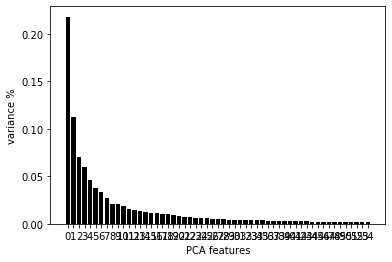

In [36]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=55)
principalComponents = pca.fit_transform(X["GM"])
print(pca.explained_variance_ratio_)

# Plot the explained variances
features = range(pca.n_components_)
explained_variance = pca.explained_variance_ratio_
plt.bar(features, explained_variance, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

plt.show()

In [37]:
PCA_components = pd.DataFrame(principalComponents)
PCA_components

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,-0.385628,-3.797450,-0.205515,0.577468,2.650235,2.107584,-0.507962,-1.988272,-0.272682,1.292063,...,0.137779,0.237009,0.125266,-0.016496,-0.297818,-0.176552,0.783608,0.180922,-0.036375,-0.247924
1,-1.852267,-0.967470,1.521799,-2.190522,1.602440,-1.351195,-0.842831,-2.400753,2.772700,-0.622955,...,0.153411,0.142124,-0.299367,-0.327034,0.568057,-0.064141,-0.210102,-0.476065,0.191214,-0.255359
2,-3.337043,-3.978068,0.821395,-1.131030,-0.451054,1.285466,1.379637,-0.724121,-0.555809,1.270822,...,-0.020739,0.158286,0.084264,0.170067,0.078069,0.138590,-0.098540,-0.015050,-0.091636,-0.221779
3,-0.253895,-0.667602,0.210576,1.674015,2.559883,3.029479,0.154352,-1.241352,0.541401,0.903706,...,0.129988,0.127864,0.132656,0.295667,-0.474486,-0.225403,0.557154,0.005034,0.197755,-0.314219
4,-1.922622,-4.428363,1.265089,0.316525,-0.389950,1.273411,2.171385,-1.398246,-0.092055,0.865351,...,-0.200493,-0.048885,0.049855,0.042029,0.006274,-0.153249,0.113816,0.094561,-0.448684,-0.005303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,-2.148289,-0.223120,-0.461049,-2.137237,-1.346175,0.538462,1.127670,1.086609,0.661684,0.514355,...,0.110827,-0.197615,-0.390731,0.103452,-0.340479,0.132572,-0.441266,0.956548,0.124544,0.265049
1074,1.624281,-3.297367,1.289536,-1.760202,2.810553,1.727617,-2.237323,-1.001370,-1.300991,-0.158205,...,0.204935,-0.341281,-0.173830,-0.536160,-0.005540,-0.012065,-0.218961,0.193200,-0.550017,0.115426
1075,-4.973996,-1.083797,-0.892020,0.877158,-0.985322,0.842784,-0.448580,0.093925,0.040904,-0.102417,...,0.037668,-0.102209,0.001897,-0.025624,0.261721,-0.148913,-0.012486,0.178260,-0.038292,-0.078984
1076,-3.509222,-1.279654,0.934532,0.395040,-1.104419,-0.579890,-0.543524,0.658254,-1.447212,-0.528566,...,-0.289530,0.350522,0.280347,0.028640,-0.377375,-0.055001,-0.493730,0.103474,0.427920,0.458447


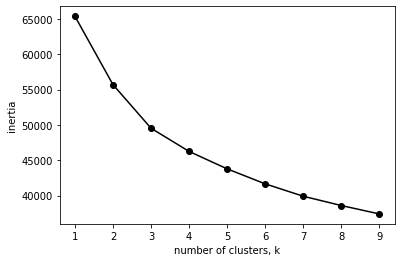

In [38]:
from sklearn.cluster import KMeans



ks = range(1, 10)

inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:53])
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [39]:
import numpy as np

# Using three clusters 
NC = 3

model = KMeans(n_clusters=NC)
   
X_01 = PCA_components.iloc[:,:53].values

y_km = model.fit(X_01)

clusters = {}
for idx , l in enumerate(y_km.labels_):
    if l in clusters:
        clusters[l].append(X_01[idx])
    else:
        clusters[l] = []
        clusters[l].append(X_01[idx])
        
        
c1 = np.asarray(clusters[0])

c2 = np.asarray(clusters[1])


c3 = np.asarray(clusters[2])

In [40]:
print(len(c1))
print(len(c2))
print(len(c3))

325
710
43


In [41]:
for idx , l in enumerate(y_km.labels_):
    print( idx, l )

0 1
1 1
2 1
3 1
4 1
5 1
6 1
7 1
8 1
9 1
10 1
11 1
12 1
13 1
14 1
15 1
16 1
17 1
18 1
19 1
20 1
21 1
22 1
23 1
24 1
25 0
26 1
27 1
28 1
29 1
30 1
31 1
32 1
33 1
34 1
35 1
36 1
37 1
38 1
39 1
40 1
41 1
42 1
43 1
44 1
45 1
46 1
47 1
48 1
49 1
50 1
51 1
52 1
53 1
54 1
55 1
56 1
57 1
58 1
59 1
60 1
61 1
62 1
63 1
64 1
65 1
66 1
67 1
68 1
69 1
70 1
71 1
72 1
73 1
74 1
75 1
76 1
77 1
78 1
79 1
80 1
81 1
82 2
83 1
84 1
85 0
86 1
87 0
88 0
89 0
90 1
91 1
92 1
93 0
94 1
95 0
96 0
97 1
98 1
99 0
100 1
101 0
102 0
103 1
104 1
105 0
106 0
107 1
108 0
109 0
110 1
111 1
112 1
113 0
114 0
115 1
116 1
117 1
118 1
119 1
120 1
121 1
122 1
123 1
124 0
125 1
126 1
127 0
128 1
129 1
130 1
131 1
132 1
133 0
134 0
135 1
136 1
137 1
138 1
139 1
140 0
141 1
142 0
143 1
144 1
145 0
146 1
147 1
148 1
149 0
150 0
151 0
152 1
153 1
154 0
155 1
156 1
157 0
158 1
159 1
160 0
161 0
162 1
163 1
164 1
165 0
166 1
167 0
168 1
169 0
170 1
171 0
172 1
173 1
174 1
175 1
176 1
177 1
178 1
179 1
180 0
181 1
182 0
183 0
184 0


In [42]:
file_NON_SCALATO = 'data/MOE_GRID_1078.xlsx'
file_NON_SCALATO_read = pd.read_excel( file_NON_SCALATO )
file_NON_SCALATO_dataframe = pd.DataFrame( file_NON_SCALATO_read )
file_NON_SCALATO_dataframe

,Unnamed: 0,Unnamed: 0.1,UNIQUEID,SMILE,SETID,DESCRIPTOR,LOGD,mol,AM1_dipole,AM1_E,...,vsurf_Wp3,vsurf_Wp4,vsurf_Wp5,vsurf_Wp6,vsurf_Wp7,vsurf_Wp8,Weight,weinerPath,weinerPol,zagreb
0,0,0,A-logD7.4-100,Fc1cc2c(N(C=C(C(O)=O)C2=O)C2CC2)cc1N1CCNCC1,Tr,1 0 0 0 0 0 0 0 ...,-0.960,Fc1c(N2CCNCC2)cc2N(C3CC3)C=C(C(=O)O)C(=O)c2c1,7.750276,-103541.820,...,75.625,12.500,4.500,0.625,0.0,0.0,331.34698,1234,43,134
1,1,1,A-logD7.4-101,S1(=O)(=O)N(CCN1C)c1cc2c([nH]cc2CCN(C)C)cc1,Tr,1 0 0 0 0 0 0 0 ...,-0.920,O=S1(=O)N(C)CCN1c1cc2c(CCN(C)C)c[nH]c2cc1,4.358144,-89582.016,...,74.125,10.500,2.500,0.000,0.0,0.0,322.43298,1055,35,120
2,2,2,A-logD7.4-104,OC=1C(=O)C=CN(CCCO)C=1C,Tr,1 0 0 0 0 0 0 0 ...,-0.900,O=C1C(O)=C(C)N(CCCO)C=C1,5.544390,-57643.316,...,29.625,6.125,1.125,0.000,0.0,0.0,183.20700,254,18,60
3,3,3,A-logD7.4-105,Fc1cc2c(N(C=C(C(O)=O)C2=O)c2ccccc2C)cc1N1CCNCC1,Tr,1 0 0 0 0 0 0 0 ...,-0.830,Fc1c(N2CCNCC2)cc2N(c3c(C)cccc3)C=C(C(=O)O)C(=O...,8.887918,-116000.170,...,84.375,11.500,4.125,0.625,0.0,0.0,381.40698,1842,51,152
4,4,4,A-logD7.4-106,OC=1C(=O)C=CN(CCC(=O)NCC)C=1C,Tr,1 0 0 0 0 0 0 0 ...,-0.820,O=C(NCC)CCN1C(C)=C(O)C(=O)C=C1,6.219123,-69271.062,...,56.875,14.125,3.125,0.000,0.0,0.0,224.25999,483,22,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,1086,1086,O-88,O(CC(O)CNC(C)C)c1ccccc1CC=C,Tr,1 0 0 0 0 0 0 0 ...,1.000,O(C[C@@H](O)CNC(C)C)c1c(CC=C)cccc1,0.588812,-71140.453,...,56.500,14.250,3.625,0.750,0.0,0.0,249.35399,711,21,80
1074,1087,1087,O-9,O1CCC[C@H]1C(=O)N1CCN(CC1)c1nc(N)c2cc(OC)c(OC)...,Tr,1 0 0 0 0 0 0 0 ...,1.140,O=C(N1CCN(c2nc(N)c3c(n2)cc(OC)c(OC)c3)CC1)[C@H...,2.551292,-117421.360,...,126.125,25.375,8.875,1.375,0.0,0.0,387.44000,2195,47,150
1075,1088,1088,O-94,O1c2c(C=CC1=O)cccc2,Tr,1 0 0 0 0 0 0 0 ...,1.415,O=C1Oc2c(cccc2)C=C1,4.817789,-43230.504,...,2.875,0.000,0.000,0.000,0.0,0.0,146.14499,144,14,56
1076,1089,1089,O-97,Clc1cccc(Cl)c1C=NN=C(N)N,Te,1 0 0 0 0 0 0 0 ...,1.670,Clc1c(C=N/N=C(\N)/N)c(Cl)ccc1,2.182817,-62454.488,...,156.875,43.875,12.250,0.875,0.0,0.0,231.08600,331,17,64


In [43]:
%%time
import numpy as np 
import string


list_of_desc = ["a_acc", \
                  "bpol", \
                  "b_double", \
                  "b_rotN", \
                  "b_rotR", \
                  "chi1_C", \
                  "diameter", \
                  "logP(o/w)", \
                  "logS", \
                  "PEOE_VSA+0", \
                  "PEOE_VSA+3", \
                  "PEOE_VSA-0", \
                  "PEOE_VSA-2", \
                  "PEOE_VSA-5", \
                  "PEOE_VSA_POS", \
                  "SlogP_VSA0", \
                  "SlogP_VSA1", \
                  "SlogP_VSA2", \
                  "SlogP_VSA3", \
                  "SlogP_VSA4", \
                  "SlogP_VSA8", \
                  "SMR_VSA1", \
                  "SMR_VSA6", \
                  "TPSA", \
                  "vsa_acc", \
                  "vsa_other", \
                  "vsa_pol", \
                  "weinerPol", \
                  "DESCRIPTOR"]
                
basicname = ["G", "M", "GM", \
             "GTr", "GTe", \
             "MTe", "MTr", \
             "GMTe", "GMTr"]

X = {}
Y = {}
setid = {}
uniqueid = {}

for bn in basicname:
    X[bn] = []
    Y[bn] = []
    setid[bn] = []
    uniqueid[bn] = []

for idx, ss in enumerate(file_NON_SCALATO_read["UNIQUEID"]):
    
    fdesc = file_NON_SCALATO_read[file_NON_SCALATO_read["UNIQUEID"] == ss]
    
    xval = {}
    for bn in basicname:
        xval[bn] = []

    for d in list_of_desc:
        if d == "DESCRIPTOR":
            nvs = fdesc[d].values[0].split()
            xval["GM"].extend([float(nv) for nv in nvs])  
            xval["G"].extend([float(nv) for nv in nvs])  
            xval["GMTr"].extend([float(nv) for nv in nvs])  
            xval["GTr"].extend([float(nv) for nv in nvs])  
            xval["GMTe"].extend([float(nv) for nv in nvs])  
            xval["GTe"].extend([float(nv) for nv in nvs])  
        else:
            xval["GM"].append(fdesc[d].values[0])
            xval["M"].append(fdesc[d].values[0])
            xval["GMTr"].append(fdesc[d].values[0])
            xval["MTr"].append(fdesc[d].values[0])
            xval["GMTe"].append(fdesc[d].values[0])
            xval["MTe"].append(fdesc[d].values[0])
            
    y = file_NON_SCALATO_read[file_NON_SCALATO_read["UNIQUEID"] == ss]['LOGD'].values[0]
    sid = file_NON_SCALATO_read[file_NON_SCALATO_read["UNIQUEID"] == ss]['SETID'].values[0]
    uid = file_NON_SCALATO_read[file_NON_SCALATO_read["UNIQUEID"] == ss]['UNIQUEID'].values[0]
    
    for bn in ["GM", "G", "M"]:
        X[bn].append(xval[bn])
        Y[bn].append(y)
        setid[bn].append(sid)
        uniqueid[bn].append(uid)
        
    if (sid == "Tr"):
        for bn in ["GMTr", "GTr", "MTr"]:
            X[bn].append(xval[bn])
            Y[bn].append(y)
            setid[bn].append(sid)
            uniqueid[bn].append(uid)
    elif (sid == "Te"):
        for bn in ["GMTe", "GTe", "MTe"]:
            X[bn].append(xval[bn])
            Y[bn].append(y)
            setid[bn].append(sid)
            uniqueid[bn].append(uid)


for bn in basicname:
    print(bn, " : ")
    print("  ", np.asarray(Y[bn]).shape, np.asarray(X[bn]).shape )  

G  : 
   (1078,) (1078, 1879)
M  : 
   (1078,) (1078, 28)
GM  : 
   (1078,) (1078, 1907)
GTr  : 
   (865,) (865, 1879)
GTe  : 
   (213,) (213, 1879)
MTe  : 
   (213,) (213, 28)
MTr  : 
   (865,) (865, 28)
GMTe  : 
   (213,) (213, 1907)
GMTr  : 
   (865,) (865, 1907)
CPU times: user 11.3 s, sys: 47.6 ms, total: 11.4 s
Wall time: 11.4 s


In [44]:
indici_cluster_ZERO = []
indici_cluster_UNO = []
indici_cluster_DUE = []


for cont, num in enumerate (y_km.labels_) :
    if num==0 :
        indici_cluster_ZERO.append( cont )
    elif num==1 :
        indici_cluster_UNO.append( cont )
    elif num==2 :
        indici_cluster_DUE.append( cont )
        
print(len(indici_cluster_ZERO))
print(len(indici_cluster_UNO))
print(len(indici_cluster_DUE))

325
710
43


In [45]:
SETID_value = file_NON_SCALATO_dataframe['SETID']

SETID_ZERO = []
SETID_UNO = []
SETID_DUE = [] 


for ind in indici_cluster_ZERO :
    SETID_ZERO.append(SETID_value[ind])
    
SETID_UNO = []
for ind in indici_cluster_UNO :
    SETID_UNO.append(SETID_value[ind])
    
SETID_DUE = []
for ind in indici_cluster_DUE :
    SETID_DUE.append(SETID_value[ind])
    

In [46]:
Y_GM_0 = []

Y_GM_1 = []

Y_GM_2 = []


for idx, y in enumerate (Y['GM']) :
    if idx in indici_cluster_ZERO :
        Y_GM_0.append( y )
    elif idx in indici_cluster_UNO :
        Y_GM_1.append( y )
    elif idx in indici_cluster_DUE :
        Y_GM_2.append( y )
        
print("Y_GM_0 :\n", Y_GM_0)
print("Y_GM_1 :\n", Y_GM_1)
print("Y_GM_2 :\n", Y_GM_2)
        

Y_GM_0 :
 [-0.5, 0.25, -2.59, 0.3, 0.3, 0.37, 0.4, 0.4, 0.42, 0.49, 0.5, 0.5, 0.5, 0.5, -2.73, 0.6, 0.6, 0.7, 0.79, 0.89, 0.89, 1.0, 1.04, 1.09, 1.1, 1.1, 1.1, 1.1, 1.14, 1.17, 1.18, 1.2, 1.21, 1.22, 1.25, 1.3, 1.3, 1.31, 1.31, 1.37, 1.38, 1.45, 1.41, 1.47, 1.47, 1.47, 1.49, 1.58, 1.6, 1.61, 1.63, 1.64, 1.64, 1.68, 1.69, 1.7, 1.76, 1.79, 1.85, 1.87, 1.95, 2.03, 2.07, 2.1, 2.1, 2.1, 2.1, 2.17, 2.17, 2.18, 2.2, -1.51, 2.24, 2.27, 2.28, 2.3, 2.3, 2.3, 2.32, 2.34, 2.35, 2.4, 2.4, 2.41, 2.49, 2.5, 2.5, -1.38, 2.59, 2.6, 2.6, 2.64, 2.64, 2.7, 2.7, 2.71, 2.75, 2.76, 2.8, 2.9, 2.9, 2.9, 2.91, 2.93, 2.94, 2.96, 3.02, 3.02, 3.02, 3.11, 3.2, 3.26, 4.76, 3.4, 3.5, 3.5, 3.54, 5.77, 3.61, 5.39, 3.65, 3.7, 3.7, 3.7, 3.7, 3.71, 3.74, 3.77, 3.81, 3.81, 4.02, 4.02, 4.03, 4.09, 6.03, 4.25, 6.16, 4.42, 6.66, 4.65, 4.7, -1.1, 5.07, 5.1, 5.2, 5.61, 3.46, 3.52, 3.65, 3.94, 4.1, 6.07, 0.3, 6.1, 2.98, 2.1, 1.81, 2.3, 0.7, 2.2, 2.4, 2.4, 2.6, 2.8, 2.9, 2.9, 2.9, 2.9, 3.0, 3.0, 3.0, 3.1, 3.1, 3.1, 3.4, 3.4, 3.4,

In [47]:
Y_GM_0_TR = []
Y_GM_0_TE = []

for idx, y_0 in enumerate (Y_GM_0) :
    if SETID_ZERO[idx]==("Tr") :
        Y_GM_0_TR.append( y_0 )
    elif SETID_ZERO[idx]==("Te") :
        Y_GM_0_TE.append( y_0 )
        
print(Y_GM_0_TR)
print(Y_GM_0_TE)

[-0.5, 0.25, -2.59, 0.3, 0.37, 0.4, 0.42, 0.49, 0.5, 0.5, 0.5, 0.5, -2.73, 0.6, 0.6, 0.7, 0.79, 0.89, 0.89, 1.0, 1.04, 1.09, 1.1, 1.1, 1.1, 1.1, 1.17, 1.18, 1.2, 1.21, 1.25, 1.3, 1.31, 1.31, 1.37, 1.38, 1.45, 1.41, 1.47, 1.47, 1.47, 1.49, 1.58, 1.61, 1.63, 1.64, 1.68, 1.69, 1.79, 1.87, 1.95, 2.07, 2.1, 2.1, 2.1, 2.17, 2.18, 2.2, -1.51, 2.24, 2.27, 2.28, 2.3, 2.3, 2.32, 2.34, 2.35, 2.4, 2.41, 2.49, 2.5, 2.5, 2.59, 2.6, 2.6, 2.64, 2.7, 2.7, 2.71, 2.76, 2.8, 2.9, 2.9, 2.9, 2.91, 2.93, 2.94, 2.96, 3.02, 3.02, 3.02, 3.11, 3.2, 3.26, 4.76, 3.4, 3.5, 3.5, 3.54, 5.77, 3.61, 3.7, 3.7, 3.7, 3.7, 3.74, 3.77, 3.81, 4.02, 4.02, 4.03, 6.03, 6.16, 4.42, 6.66, 4.65, 4.7, -1.1, 5.07, 5.1, 5.2, 5.61, 3.46, 3.65, 3.94, 4.1, 6.07, 6.1, 2.98, 1.81, 2.3, 2.4, 2.4, 2.9, 2.9, 3.0, 3.0, 3.1, 3.1, 3.4, 3.4, 3.7, 4.2, 1.68, 2.73, 2.92, 1.37, 2.06, 1.34, 2.51, 0.88, 3.26, 2.86, 1.56, 3.44, 1.17, 1.55, 1.37, 2.67, 1.91, 1.5, 3.29, 2.32, 1.75, 2.54, 1.52, 1.13, 0.95, 3.36, 2.8, 3.61, 2.1, 2.88, 3.62, 3.13, 1.91, 2.

In [48]:
Y_GM_1_TR = []
Y_GM_1_TE = []

for idx, y_1 in enumerate (Y_GM_1) :
    if SETID_UNO[idx]==("Tr") :
        Y_GM_1_TR.append( y_1 )
    elif SETID_UNO[idx]==("Te") :
        Y_GM_1_TE.append( y_1 )
        
print(Y_GM_1_TR)
print(Y_GM_1_TE)

[-0.96, -0.92, -0.9, -0.83, -0.82, -0.79, -0.78, -0.77, -0.77, -0.77, -0.75, -0.75, -0.73, -0.73, -0.7, -0.67, -0.66, -0.64, -0.57, -0.55, -0.52, -0.51, -0.39, -0.48, -0.47, -0.46, -0.43, -2.92, -0.43, -0.43, -0.41, -0.41, -0.4, -0.36, -0.34, -0.32, -0.32, -0.31, -0.28, -0.26, -0.24, -0.23, -0.2, -0.2, -0.2, -0.17, -0.16, -0.12, -0.08, -0.06, -2.75, -0.07, -0.03, -0.02, 0.008, 0.02, 0.02, 0.03, 0.04, 0.05, 0.05, 0.05, 0.05, 0.19, 0.11, 0.12, 0.16, 0.16, 0.18, 0.2, 0.22, 0.254, 0.31, 0.31, 0.31, 0.393999999999999, 0.4, 0.4, 0.47, 0.5, 0.5, 0.5, 0.55, 0.57, 0.6, 0.6, 0.6, 0.61, 0.65, 0.69, 0.7, 0.7, 0.72, 0.73, 0.8, 0.8, 0.85, 0.86, 0.88, 0.9, 0.9, 0.96, 1.0, 1.01, 1.06, 1.09, 1.09, -2.12, 1.1, 1.1, 1.1, 1.12, 1.14, 1.15, 1.2, 1.2, 1.2, 1.22, 1.24, 1.27, 1.3, 1.3, 1.3, 1.3, 1.3, 1.36, 1.4, 1.4, 1.4, 1.4, 1.42, 1.44, 1.45, 1.5, 1.52, -1.71, 1.54, 1.55, 1.59, 1.6, 1.6, 1.6, 1.6, 1.61, 1.63, 1.64, 1.66, 1.7, 1.7, -1.7, 1.7, 1.7, 1.73, 1.76, 1.78, 1.79, 1.8, 1.8, -1.6, 1.8, 1.8, 1.88, 1.89, 

In [49]:
Y_GM_2_TR = []
Y_GM_2_TE = []

for idx, y_2 in enumerate (Y_GM_2) :
    if SETID_DUE[idx]==("Tr") :
        Y_GM_2_TR.append( y_2 )
    elif SETID_DUE[idx]==("Te") :
        Y_GM_2_TE.append( y_2 )
        
print(Y_GM_2_TR)
print(Y_GM_2_TE)

[0.2, 2.1, 2.42, 3.4, 3.7, 3.9, 4.22, 4.3, 4.3, 4.38, 4.6, 4.7, 4.85, 2.8, 3.6, 4.07, 3.8, 4.11, 3.5, 4.3, 4.2, 4.5, 4.4, 4.2, 4.0, 2.8, 3.3, 3.5, 3.2, 0.45, 1.92, -1.95, 0.98, 1.14, 0.33]
[-1.33, 2.8, 4.0, 4.3, 4.5, 4.8, 3.5, 4.4]


In [50]:
import numpy as np
X_GM_0 = []

X_GM_1 = []

X_GM_2 = []


for idx, x in enumerate (X["GM"]) :
    if idx in indici_cluster_ZERO :
        X_GM_0.append( x )
    elif idx in indici_cluster_UNO :
        X_GM_1.append( x )
    elif idx in indici_cluster_DUE :
        X_GM_2.append( x )
        

print(np.shape( X_GM_0))
print(np.shape(X_GM_1))
print(np.shape( X_GM_2))

(325, 1907)
(710, 1907)
(43, 1907)


In [51]:
X_GM_0_TR = []
X_GM_0_TE = []

for idx, x_0 in enumerate (X_GM_0) :
    if SETID_ZERO[idx]==("Tr") :
        X_GM_0_TR.append( x_0 )
    elif SETID_ZERO[idx]==("Te") :
        X_GM_0_TE.append( x_0 )
        
print(np.shape(X_GM_0_TR))
print(np.shape(X_GM_0_TE))

(265, 1907)
(60, 1907)


In [52]:
X_GM_1_TR = []
X_GM_1_TE = []

for idx, x_1 in enumerate (X_GM_1) :
    if SETID_UNO[idx]==("Tr") :
        X_GM_1_TR.append( x_1 )
    elif SETID_UNO[idx]==("Te") :
        X_GM_1_TE.append( x_1 )
        
print(np.shape(X_GM_1_TR))
print(np.shape(X_GM_1_TE))

(565, 1907)
(145, 1907)


In [53]:
X_GM_2_TR = []
X_GM_2_TE = []

for idx, x_2 in enumerate (X_GM_2) :
    if SETID_DUE[idx]==("Tr") :
        X_GM_2_TR.append( x_2 )
    elif SETID_DUE[idx]==("Te") :
        X_GM_2_TE.append( x_2 )
        
print(np.shape(X_GM_2_TR))
print(np.shape(X_GM_2_TE))

(35, 1907)
(8, 1907)


In [54]:
%%time
import sklearn 
import sklearn.preprocessing 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_GM_SCALED_Tr_0 = scaler.fit_transform(X_GM_0_TR)
X_GM_SCALED_Tr_0_dataframe = pd.DataFrame(X_GM_SCALED_Tr_0)

X_GM_SCALED_Te_0 = scaler.fit_transform(X_GM_0_TE)
X_GM_SCALED_Te_0_dataframe = pd.DataFrame(X_GM_SCALED_Te_0)
print(X_GM_SCALED_Tr_0_dataframe)
print(X_GM_SCALED_Te_0_dataframe)

X_GM_SCALED_TOT_0 = scaler.fit_transform(X_GM_0)
X_GM_SCALED_TOT_0_dataframe = pd.DataFrame(X_GM_SCALED_TOT_0)
print(X_GM_SCALED_TOT_0_dataframe)

         0         1         2         3         4         5         6     \
0    0.302626 -0.072172  1.286462  0.568218  0.232907  0.781501 -1.143890   
1   -0.232013 -1.035824 -1.037941 -0.993791 -0.727668 -0.775469 -0.489886   
2    0.837265 -0.500466  3.610864  2.130227  2.473461 -1.368340  0.164118   
3   -0.232013 -0.177953  0.511661  0.255816  0.869829 -0.379473 -0.816888   
4    0.837265 -2.333654  0.511661 -0.993791 -0.570168 -2.028115 -1.470892   
..        ...       ...       ...       ...       ...       ...       ...   
260 -0.232013 -0.769646 -1.037941 -0.056586  0.182557  0.072351 -0.489886   
261  0.302626  1.886784  2.061263 -1.306193 -1.767716  1.449896 -0.816888   
262 -0.766653 -1.791055 -0.263140 -0.681390  0.365830 -0.580548 -1.470892   
263 -0.766653 -1.130002  0.511661 -0.681390 -0.390168  0.599925 -1.470892   
264  1.371905 -1.933384  0.511661 -1.306193 -0.930167 -1.083977 -0.816888   

         7         8         9     ...  1897      1898  1899  1900      190

         0         1         2         3         4         5         6     \
0    0.337124 -0.055639  1.256787  0.626546  0.293972  0.804098 -1.052357   
1   -0.210702 -1.009373 -1.077246 -0.913753 -0.656779 -0.721866 -0.421913   
2    0.884950 -0.479525  3.590819  2.166845  2.511613 -1.302930  0.208532   
3   -0.210702 -0.160331  0.478776  0.318486  0.924380 -0.333755 -0.737135   
4   -0.210702 -1.098468 -0.299235 -1.837932 -1.658922 -0.258609 -2.313246   
..        ...       ...       ...       ...       ...       ...       ...   
320 -0.758529 -1.756831 -0.299235 -0.605693  0.425535 -0.530826 -1.367579   
321 -0.758529 -1.102582  0.478776 -0.605693 -0.322731  0.626139 -1.367579   
322  1.432776 -1.897696  0.478776 -1.221812 -0.857208 -1.024230 -0.737135   
323 -1.854181 -0.732821 -0.299235 -0.605693 -0.144572  1.074562 -1.367579   
324 -0.758529 -1.102582  0.478776 -0.605693 -0.322731  0.626139 -1.367579   

         7         8         9     ...  1897      1898  1899  1900      190

In [55]:
scaler = StandardScaler()
X_GM_SCALED_Tr_1 = scaler.fit_transform(X_GM_1_TR)
X_GM_SCALED_Tr_1_dataframe = pd.DataFrame(X_GM_SCALED_Tr_1)

X_GM_SCALED_Te_1 = scaler.fit_transform(X_GM_1_TE)
X_GM_SCALED_Te_1_dataframe = pd.DataFrame(X_GM_SCALED_Te_1)
print(X_GM_SCALED_Tr_1_dataframe)
print(X_GM_SCALED_Te_1_dataframe)

X_GM_SCALED_TOT_1 = scaler.fit_transform(X_GM_1)
X_GM_SCALED_TOT_1_dataframe = pd.DataFrame(X_GM_SCALED_TOT_1)
print(X_GM_SCALED_TOT_1_dataframe)

         0         1         2         3         4         5         6     \
0    0.794055  0.478931  1.108449 -0.348954 -0.650139  0.161974  0.297994   
1    0.012450  1.741051 -1.152467  0.101181 -0.104393 -0.520640  0.297994   
2    0.012450 -0.855617  1.108449 -0.348954  0.525313 -1.230226 -0.826949   
3    0.794055  0.763129  1.108449 -0.348954 -0.790976  1.088131  0.297994   
4    0.012450 -0.219006  1.862088  0.551315  1.328188 -0.931947 -0.076987   
..        ...       ...       ...       ...       ...       ...       ...   
560  0.012450 -0.630377 -0.398828 -0.348954  0.714225 -0.905364 -1.576911   
561  0.012450  0.518320 -0.398828  1.901720  2.624333  0.264725  0.297994   
562  2.357264  2.111455 -0.398828  0.551315 -0.157207 -0.153015  1.797918   
563 -1.550759 -1.858630  0.354811 -1.699358 -1.741629 -0.835629 -1.576911   
564  1.575659  1.427226  1.108449 -0.799089 -1.064152  1.716461  0.672975   

         7         8         9     ...      1897     1898  1899  1900  \
0 

In [56]:
scaler = StandardScaler()
X_GM_SCALED_Tr_2 = scaler.fit_transform(X_GM_2_TR)
X_GM_SCALED_Tr_2_dataframe = pd.DataFrame(X_GM_SCALED_Tr_2)

X_GM_SCALED_Te_2 = scaler.fit_transform(X_GM_2_TE)
X_GM_SCALED_Te_2_dataframe = pd.DataFrame(X_GM_SCALED_Te_2)
print(X_GM_SCALED_Tr_2_dataframe)
print(X_GM_SCALED_Te_2_dataframe)

X_GM_SCALED_TOT_2 = scaler.fit_transform(X_GM_2)
X_GM_SCALED_TOT_2_dataframe = pd.DataFrame(X_GM_SCALED_TOT_2)
print(X_GM_SCALED_TOT_2_dataframe)

        0         1         2         3         4         5         6     \
0  -1.461677 -3.364400 -0.519720 -0.993475 -0.172860 -3.522820 -1.380116   
1  -0.182710 -1.004094  0.916348  0.848730  0.883759 -1.324287  0.161503   
2  -1.887999 -2.880409  0.437659 -0.187510  0.744485 -2.426152 -1.380116   
3   1.096257  0.368336  0.916348 -1.684302 -1.716516  0.573472 -0.866243   
4  -0.609032  0.917110 -0.519720  0.733592  0.712472  0.284987  0.418439   
5   1.096257  0.368336  0.916348 -1.684302 -1.716516  0.582862 -0.609307   
6   0.669935  0.368336  0.916348 -1.684302 -1.705743  0.666416 -0.866243   
7  -0.609032  0.327221 -0.519720  0.618455  0.708268  0.006155  0.161503   
8  -0.182710  0.978868 -0.519720  0.733592  0.556644  0.842651  0.932313   
9   0.669935  0.368336  1.395037 -1.569164 -1.610579  0.945249 -0.866243   
10 -0.609032  0.508887 -0.519720  0.733592  0.768192 -0.179733  0.418439   
11 -1.035354  0.008776 -0.519720  0.618455  0.766011  0.679316  0.161503   
12 -2.314321

In [57]:
def Modelli_SVM_clusters( X_Tr, Y_Tr, X_Te, Y_Te, X_Tot, Y_Tot ) :
    import math
    import matplotlib.pyplot as plt
    from sklearn import svm
    from sklearn.svm import SVR
    from sklearn import metrics
    from sklearn.metrics import r2_score
    from sklearn.metrics import mean_squared_error
    from sklearn.model_selection import cross_val_predict 
    from sklearn.model_selection import cross_val_score


    svr_model = svm.SVR(gamma='scale',kernel='linear', C=1, epsilon=0.1)
    svr_model.fit(X_Tr,Y_Tr)
    Y_pred_TOT = svr_model.predict(X_Tot)
    Y_pred_Tr = svr_model.predict(X_Tr)
    Y_cv_Tr = cross_val_predict( svr_model, X_Tr, Y_Tr, cv=10)
    Y_pred_Te = svr_model.predict(X_Te)
    diff_abs_modello = []
    diff_NOabs_modello = []
    
    diff_abs_modello_Tot = []
    diff_abs_modello_Te = []
    diff_abs_modello_Tr = []
    
    diff_NOabs_modello_Tot = []
    diff_NOabs_modello_Te = []
    diff_NOabs_modello_Tr = []
    
    for idx, v in enumerate(Y_Tot):
        diff_abs_Tot = math.fabs(v-Y_pred_TOT[idx])
        diff_abs_modello_Tot.append(diff_abs_Tot)
        diff_NOabs_Tot = v-Y_pred_TOT[idx]
        diff_NOabs_modello_Tot.append(diff_NOabs_Tot)
        
    
    for idx,v in enumerate (Y_Te):
        diff_abs_Te = math.fabs(v-Y_pred_Te[idx])
        diff_abs_modello_Te.append(diff_abs_Te)
        diff_NOabs_Te = v-Y_pred_Te[idx]
        diff_NOabs_modello_Te.append(diff_NOabs_Te)
        
    for idx,v in enumerate (Y_Tr):
        diff_abs_Tr = math.fabs(v-Y_pred_Tr[idx])
        diff_abs_modello_Tr.append(diff_abs_Tr)
        diff_NOabs_Tr = v-Y_pred_Tr[idx]
        diff_NOabs_modello_Tr.append(diff_NOabs_Tr)
    
    r2_rmse_vals( Y_Tr, Y_pred_Tr, "Tr" )
    r2_rmse_vals( Y_Te, Y_pred_Te, "Te" )
    r2_rmse_vals( Y_Tot, Y_pred_TOT, "Tot" )
    
    
    
    print( "Errori sul set training :",np.average(diff_abs_modello_Tr), np.std(diff_abs_modello_Tr), np.std(diff_NOabs_modello_Tr) )
    print( "Errori sul set test :",np.average(diff_abs_modello_Te), np.std(diff_abs_modello_Te), np.std(diff_NOabs_modello_Te) )
    print( "Errori sul set totale :",np.average(diff_abs_modello_Tot), np.std(diff_abs_modello_Tot), np.std(diff_NOabs_modello_Tot) )
    
    plt.scatter(Y_Tot, Y_pred_TOT)
    plt.xlabel("Y_true_TOT")
    plt.ylabel("Y_pred_TOT")
    plt.show()   
    
    plt.scatter(Y_Tr, Y_pred_Tr)
    plt.xlabel("Y_true_Tr")
    plt.ylabel("Y_pred_Tr")
    plt.show() 
    
    plt.scatter(Y_Te, Y_pred_Te)
    plt.xlabel("Y_true_Te")
    plt.ylabel("Y_pred_Te")
    plt.show() 

r2 su Tr set è : 0.9962920076436879
rmse su Tr set è : 0.0958366490163432
r2 su Te set è : 0.7840747102936376
rmse su Te set è : 0.651770985119454
r2 su Tot set è : 0.963822943029183
rmse su Tot set è : 0.2936145195574187
Errori sul set training : 0.09379782466710526 0.01966294439804801 0.0958161988155137
Errori sul set test : 0.49626656431079463 0.42252208722236434 0.6512880138754639
Errori sul set totale : 0.14351803437771807 0.256148511421187 0.29354808510181085


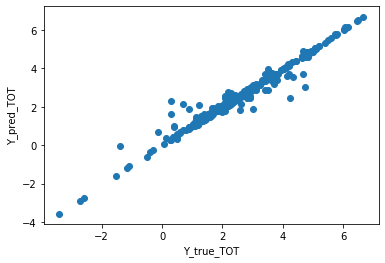

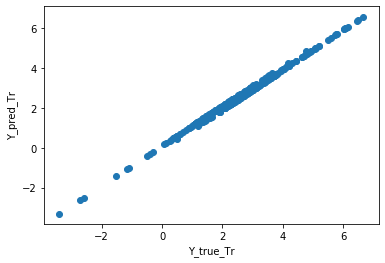

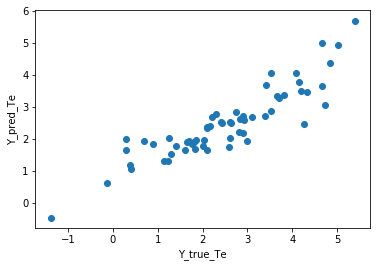

In [58]:
Modelli_SVM_clusters( X_GM_SCALED_Tr_0, Y_GM_0_TR, X_GM_SCALED_Te_0, Y_GM_0_TE, X_GM_SCALED_TOT_0, Y_GM_0 ) 

r2 su Tr set è : 0.997375433884671
rmse su Tr set è : 0.09655754383681146
r2 su Te set è : 0.8101945049331558
rmse su Te set è : 0.7469407766236393
r2 su Tot set è : 0.9697562125539926
rmse su Tot set è : 0.3224006961653887
Errori sul set training : 0.09489814456747565 0.017824181031628257 0.09647490818180628
Errori sul set test : 0.5999242885536225 0.4449846871371595 0.7047258383337914
Errori sul set totale : 0.17624717905775666 0.2699613690180696 0.31789116861340855


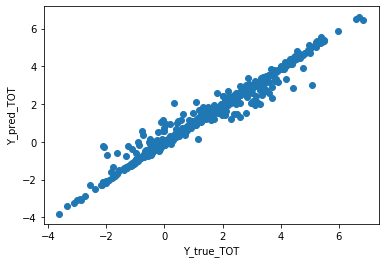

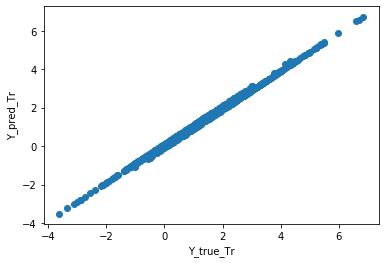

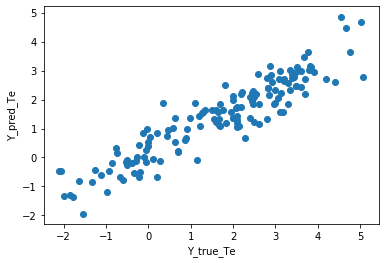

In [59]:
Modelli_SVM_clusters( X_GM_SCALED_Tr_1, Y_GM_1_TR, X_GM_SCALED_Te_1, Y_GM_1_TE, X_GM_SCALED_TOT_1, Y_GM_1 ) 

r2 su Tr set è : 0.9961843916961254
rmse su Tr set è : 0.09683866346923929
r2 su Te set è : 0.6485726601924999
rmse su Te set è : 1.1105615149438801
r2 su Tot set è : 0.8944834459218478
rmse su Tot set è : 0.5298747570968833
Errori sul set training : 0.09465284704363121 0.02045886822489301 0.09567841975967892
Errori sul set test : 0.9306462781949367 0.6060069169212164 1.0849667933096248
Errori sul set totale : 0.2592431518547309 0.46212579069437976 0.5268787357083008


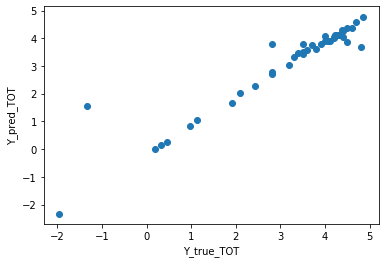

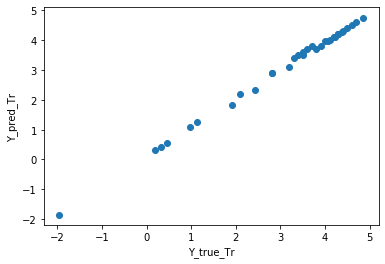

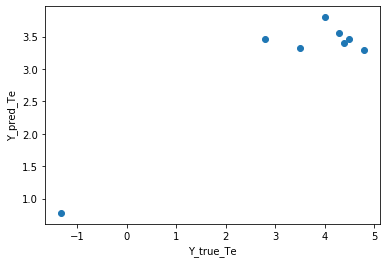

In [60]:
Modelli_SVM_clusters( X_GM_SCALED_Tr_2, Y_GM_2_TR, X_GM_SCALED_Te_2, Y_GM_2_TE, X_GM_SCALED_TOT_2, Y_GM_2 ) 